In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

Признаки в данных

In [2]:
data['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Описание датасета

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Проверяю данные, есть ли зависимости между признаками и тем, что предсказываю

In [4]:
X, y = data['data'], data['target']

In [5]:
print("Размер матрицы объектов: ", X.shape)
print("Рaзмер вектора y: ", y.shape)

Размер матрицы объектов:  (20640, 8)
Рaзмер вектора y:  (20640,)


In [6]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Строю график зависимости цены от среднего числа комнат

In [7]:
from matplotlib import pyplot as plt

<br>X['AveRooms'] - среднее количество комнат по оси x <br>y - цена дома по оси y

Text(0, 0.5, 'Price')

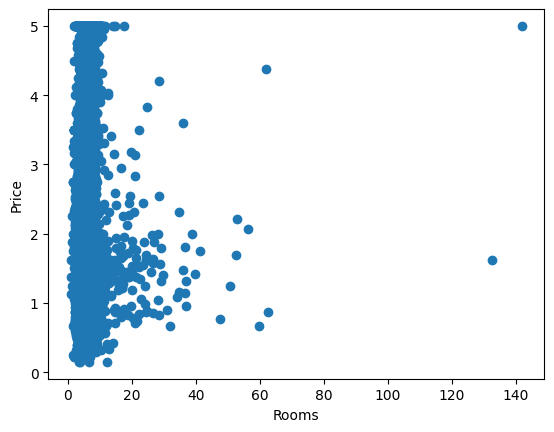

In [8]:
plt.scatter(X['AveRooms'], y)
plt.xlabel('Rooms')
plt.ylabel('Price')

Небольшая зависимость между стоимостью жилья и средним числом комнат

Разбиваю выборку на train и test

In [9]:
from sklearn.model_selection import train_test_split

В test забираю 20% наших данных, 80% на обучение модели

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<br>Решаю задачу регрессии, импортирую модуль KNeighborsRegressor <br>В linear_model находятся линейные модели, в neighbors - методы основанные на ближайших соседях

In [11]:
from sklearn.neighbors import KNeighborsRegressor

<br>Импортирую алгоритм knn из sklearn <br>Работа с алгоритмами машинного обучения в библиотеке состоит из трех этапов:
<br>- Создание объекта, который будет реализовывать алгоритм
<br>- Вызов fit: обучение модели на тренировочной подвыборке
<br>- Вызов predict: получение предсказаний на тестовой выборке

Создаю объект, соответствующий моему алгоритму <br>n_neighbors - указываю количество соседей (гиперпараметр алгоритма) <br>weights - как будут задаваться веса, которые являются соседями того объекта, для которого хотим вернуть предсказания, uniform - все веса будут одинаковыми вне зависимости от удаленности от объекта, для которого хотим вернуть предсказания <br> p = 2 - в качестве метрики близости используем евклидово расстояние, если p = 1 - манхетенское расстояние

In [12]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)

Есть обучающая выборка, обучаю алгоритм

Передаю два аргумента для обучения X_train и y_train

In [13]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Модель обучена, возвращаю предсказание для тестовой выборки

Для предсказания использую метод predict и передаю тестовую выборку

In [14]:
knn.predict(X_test)

predictions = knn.predict(X_test)

Получаю предсказание цены дома для каждого объекта из тестовой выборки

Определяю насколько хорошо работает алгоритм. Определяю качество алгоритма

Считаю метрику качества. Будет считать средне квадратичную ошибку, так как решаем задачу регрессии.

In [15]:
from sklearn.metrics import mean_squared_error

Передаю истинные таргеты y_test и предсказанные алгоритмом на тестовой выборке - predictions

In [16]:
mean_squared_error(y_test, predictions)

1.0844755265011377

Среднеквадратичная ошибка на тестовой выборке алгоритма kNN с 5 ближайшими соседями достаточно высокая. Требуется улучшить качество работы алгоритма

Поиск оптимальных гиперпараметров алгоритма kNN для улучшения качества работы алгоритма

Класс для поиска оптимальных гиперпараметров

In [17]:
from sklearn.model_selection import GridSearchCV

Принимает алгоритм и наборы параметров, которые требуется перебрать. После обучения на наших данных, класс переберет все возможные комбинации переданных параметров, померит метрики и выдаст наиболее оптимальный набор параметров

<br>Первый аргумент - KNeighborsRegressor() <br>Второй аргумент - param_grid (словарь) - сетка параметров, которые требуется перебрать, ключи - названия наших параметров KNeighborsRegressor, значения - значения, которые хотим перебрать <br><br>'n_neighbors' - отвечает за количество соседей <br>'weights' - разные стратегии для весов тех объектов, которые рядом с нами находятся <br>'distance' - вес обратно пропорционален дистанции <br>'p' - метрика расстояния между объектами <br>cv -  количество фолдов при разбиении данных

In [18]:
grid_searcher = GridSearchCV(KNeighborsRegressor(),
                             param_grid={'n_neighbors': range(1, 40, 2),
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]},
                             cv=5)

cv=5 говорит, что во время поиска оптимальных парамертов будет использоваться кросс-валидация с 5 фолдами. <br>В нашем случае, выборка будет разделена на 5 частей и на каждой из 5 итераций, часть данных будет становиться тестовой выборкой, а другая часть - обучающей. <br>Посчитав метрики на каждой итерации, сможем усреднить их в конце и получить достаточно точную оценку качества нашего алгоритма

Обучение

In [ ]:
grid_searcher.fit(X_train, y_train)

Определяем какие параметры оказались наиболее оптимальными

In [21]:
grid_searcher.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Оптимальным оказалось количество соседей равное 9, метрика - манхетенское расстояние p=1, расстояние измеряется как модуль разницы координат, веса - обратно пропорционален расстоянию

Передаем тестовую выборку, при этом будет выбран лучший алгоритм <br>Подсчитываю метрику, после подбора оптимальных параметров

In [20]:
best_predictions = grid_searcher.predict(X_test)
mean_squared_error(y_test, best_predictions)

0.9401079593334688

Качество алгоритма улучшено

Проверим, как на качество влияет количество соседей <br>Качество оценю на обучающей выборке

In [22]:
from sklearn.model_selection import cross_val_score
import numpy as np

Обучаем через цикл KNeighborsRegressor с различными значениями n_neighbors

In [23]:
metrics = []
for n in range(1, 40, 2):
  knn = KNeighborsRegressor(n_neighbors=n)
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  metrics.append(np.mean(scores))

In [24]:
from matplotlib import pyplot as plt

Визуализация массива metrics (результаты оценки качества)

Text(0.5, 0, 'Number of neightbors')

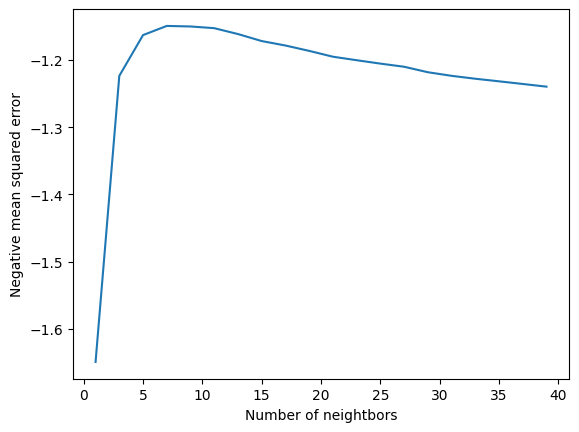

In [25]:
plt.plot(range(1, 40, 2), metrics)
plt.ylabel('Negative mean squared error')
plt.xlabel('Number of neightbors')

<br>Из графика видно, что лучшее качество при n от 5 до 15, минимальная ошибка при n приблизительно 10. <br>при маленьких значениях соседей n 1 - 5: качество быстро улучшается <br>при средних значениях соседей n 5 - 1: качество стабильно хорошее <br>при больших количествах соседей n 15 - 40: качество постепенно ухудшается

Классификация с методом ближайших соседей

Загружаю новый датасет

Добавлю шума noise=0.2

In [33]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2)
X.shape

(200, 2)

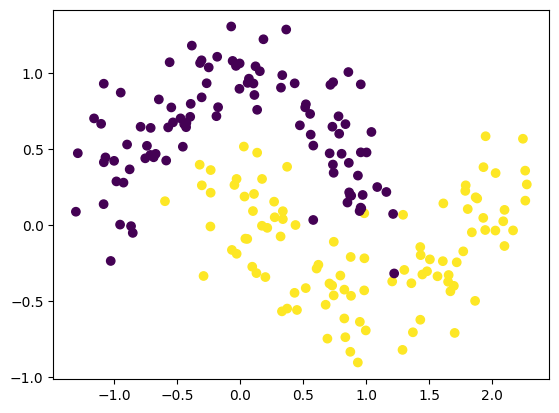

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Получил два слегка зашумленных месяца. Обучим knn на этих данных и визуализируем пространство предсказаний

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Определяем как выглядит кривая между двумя классами и как она изменяется в зависимости от количества соседей

In [59]:
x_grid, y_grid = np.meshgrid(np.linspace(-2.0, 3.0, 100), np.linspace(-2.0, 2.0, 100))
xy = np.stack([x_grid, y_grid], axis=2).reshape(-1, 2) #Объединяю матрицы
xy

array([[-2.        , -2.        ],
       [-1.94949495, -2.        ],
       [-1.8989899 , -2.        ],
       ...,
       [ 2.8989899 ,  2.        ],
       [ 2.94949495,  2.        ],
       [ 3.        ,  2.        ]])

In [60]:
predicted = knn_clf.predict(xy)

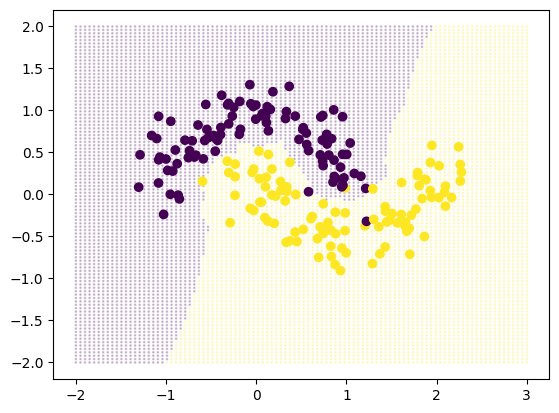

In [61]:
plt.scatter(xy[:, 0], xy[:, 1], c=predicted, alpha=0.2, s=1)
plt.scatter(X[:, 0], X[:, 1], c=y)

На картинке видны исходные данные и граница, которую knn возвел между классами